# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 50 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 20 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GroupShuffleSplit

import warnings
import seaborn as sns
sns.set_theme(palette='Set2')
warnings.filterwarnings("ignore")

#### <b><font color="blue">Легкая часть</font></b>

### Задача 1


#### 1. Загрузка данных и предобработка

#### *Профиль биология*

Загрузите [данные](https://miptstats.github.io/courses/ad_mipt.html) по предсказанию рака груди. Поодробнее о них можно почитать в [источнике](https://www.kaggle.com/datasets/marshuu/breast-cancer).


In [5]:
data = pd.read_csv('/breast_cancer.csv')
data.head(11)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


В данных нет пропусков, это показывает , что значение Non-Null Count равно количеству строк для всех столбцов.


Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

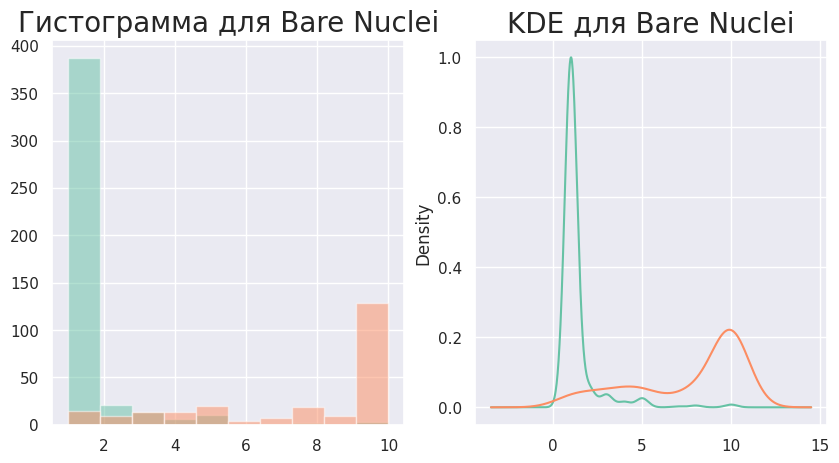

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], alpha=0.5)
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:**
Ядерная оценка плотности_это непараметрический способ оценивания случайной величины.То есть ядерная оценка плотности строится, как непрерыывная функция, которая аппроксимирует гистограмму. А гисторгама показывает дтискретные значения.

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

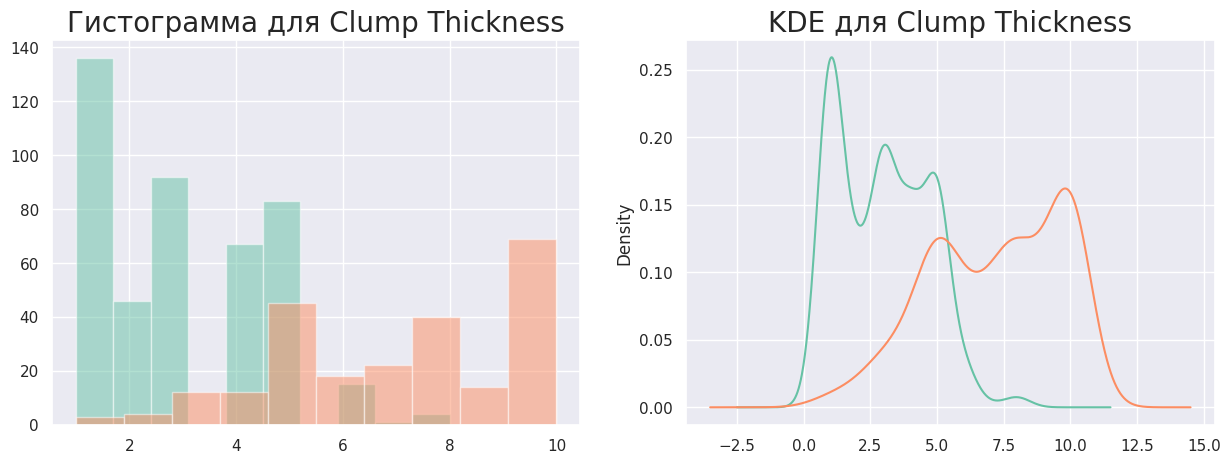

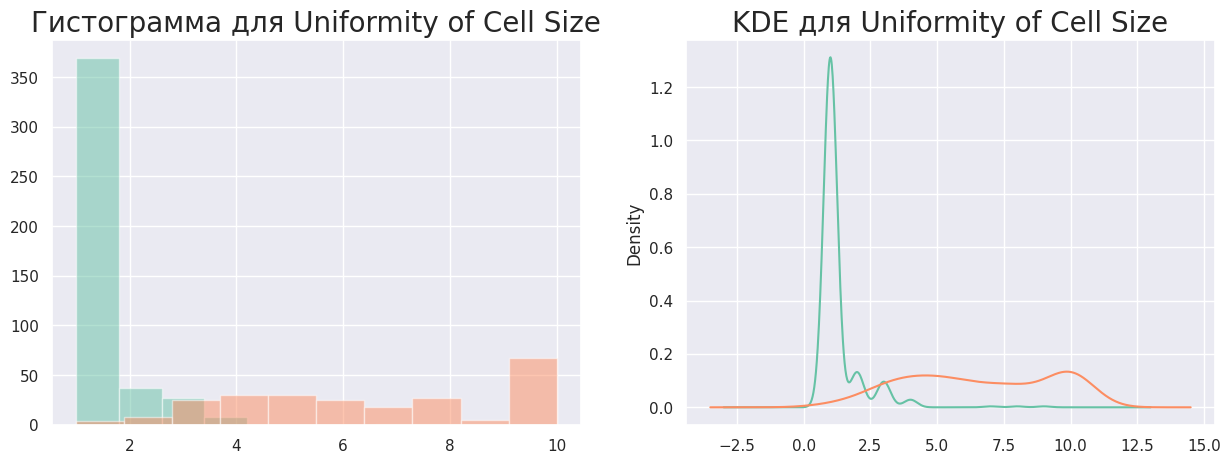

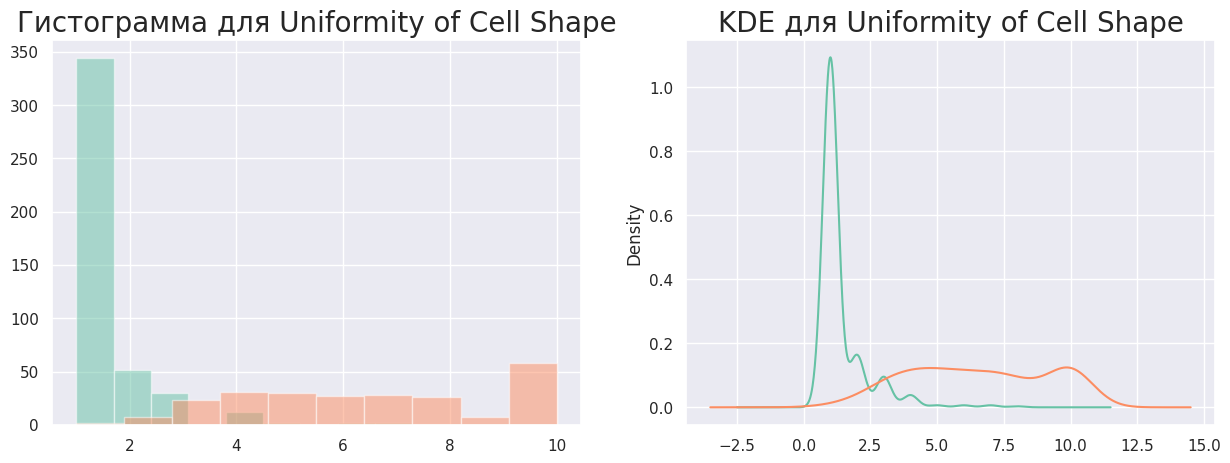

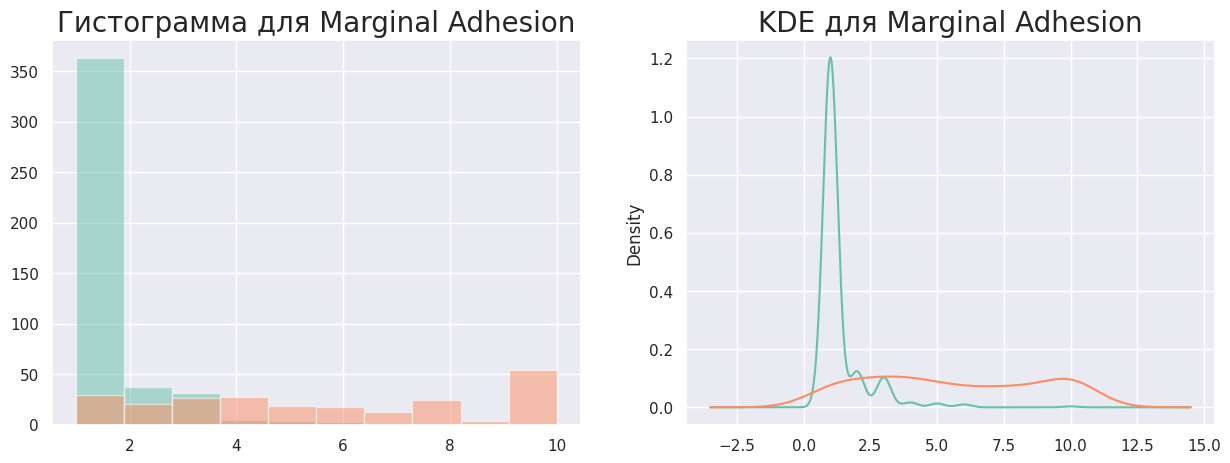

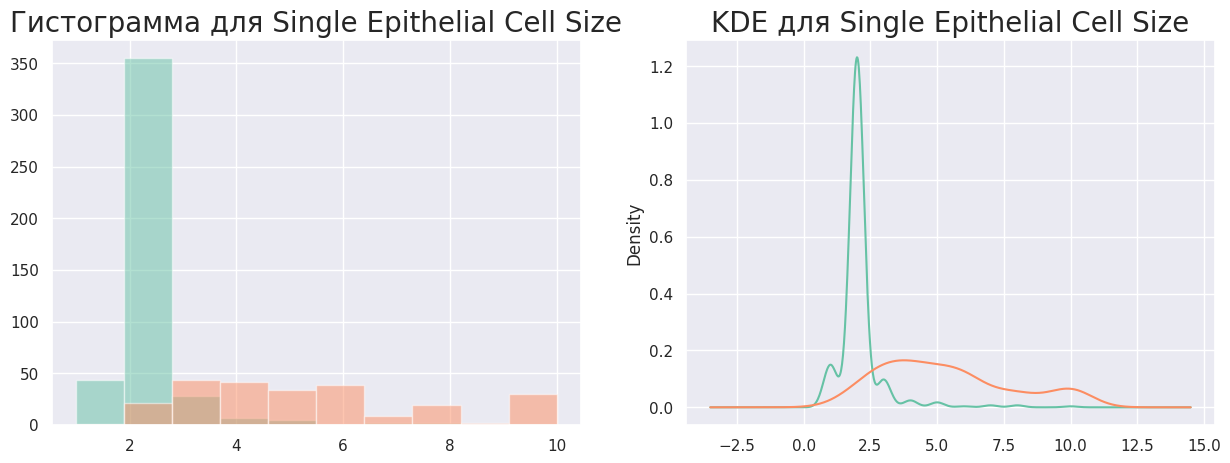

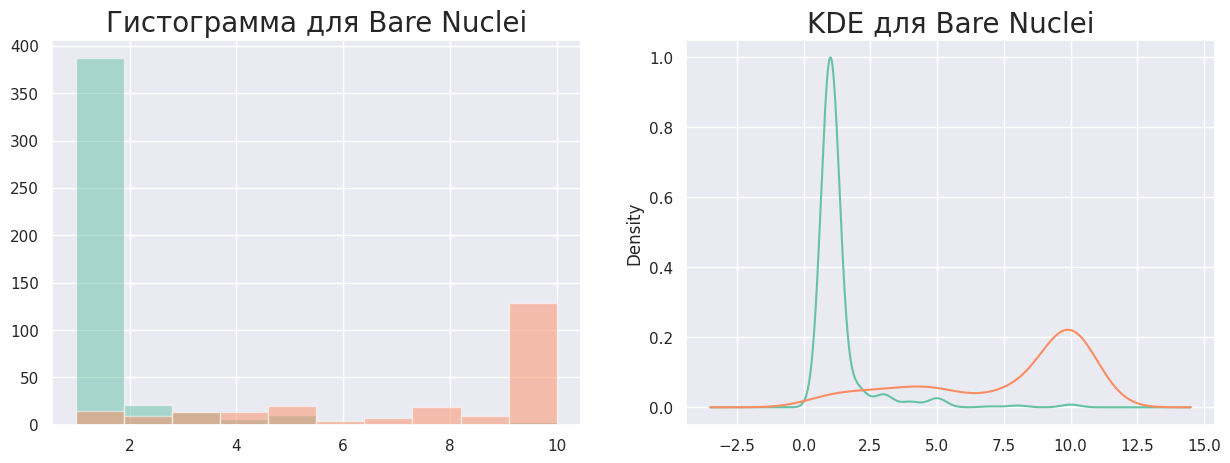

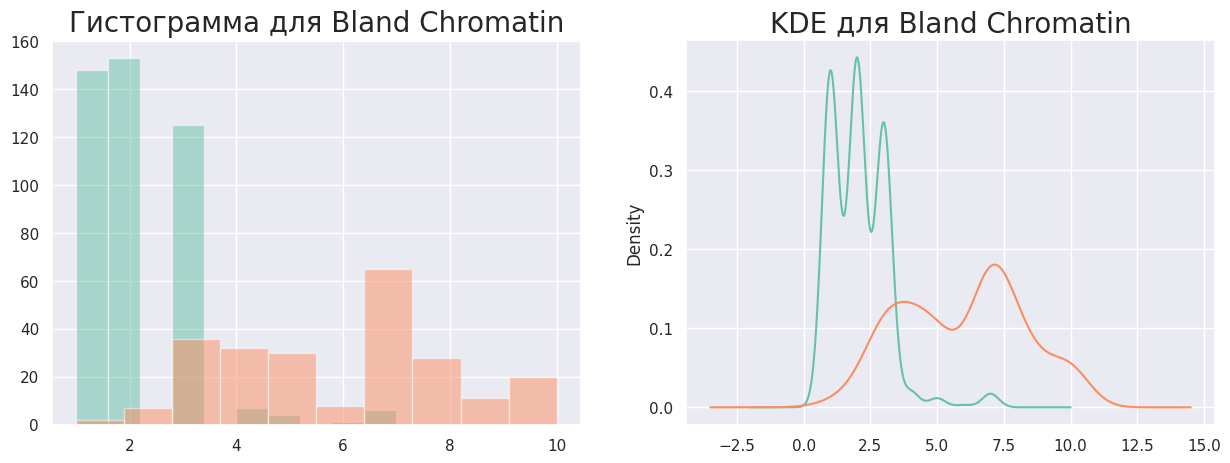

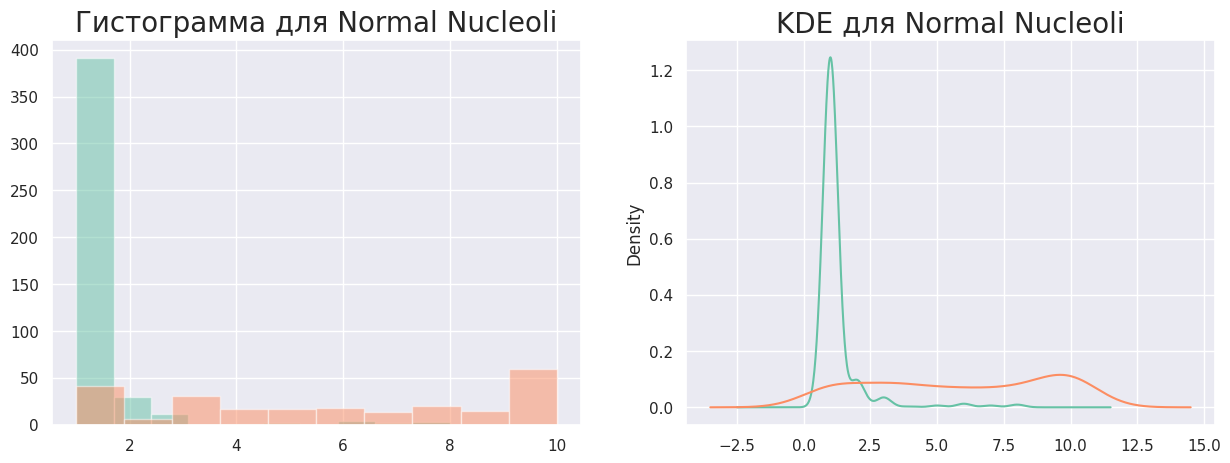

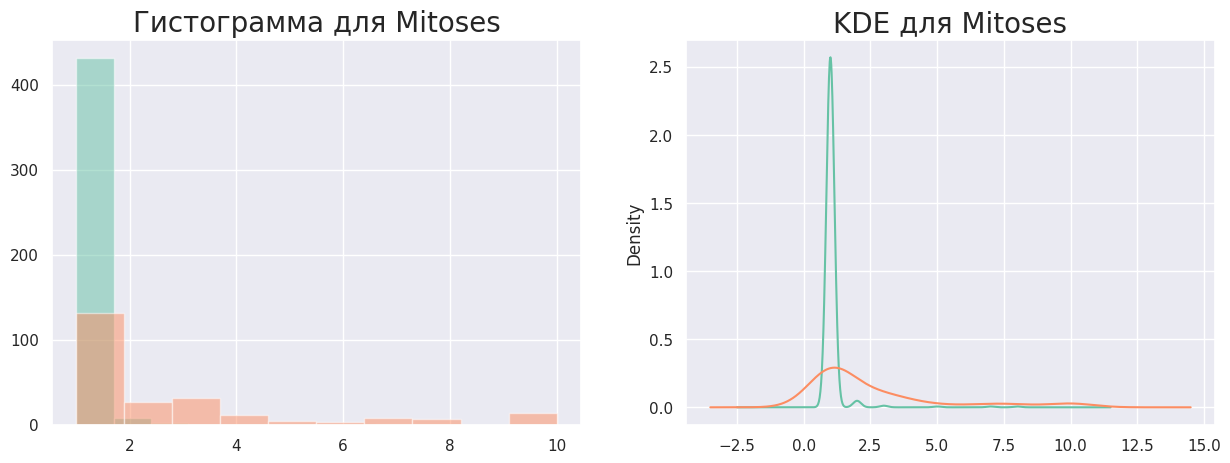

In [8]:
signs=['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size',	'Bare Nuclei',	'Bland Chromatin',	'Normal Nucleoli',	'Mitoses']
for sign in signs:
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  data.groupby("Class")[sign].hist(ax=axs[0], alpha=0.5)
  data.groupby("Class")[sign].plot(kind='kde', ax=axs[1])
  axs[0].set_title('Гистограмма для '+sign , fontsize=20)
  axs[1].set_title('KDE для '+sign , fontsize=20);

Какие выводы вы можете сделать из полученных графиков?

**Вывод:** из полученных графиков можно сделать вывод, что для класса 2 значения каждого признака имею выброс. Для класса 1 значения признаков не имею выбросов. Также для класса 1 значения признаков распределены равномерно.

**Это не конец задачи! Переходите к пункту 2!**

#### *Профиль физика*

Загрузите данные по бинарной классификации астероидов в зависимости от различных параметров с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>.

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data). Можно заметить, что наш датасет сильно меньше по размерам, чем оригинал. Это сделано намеренно.

In [ ]:
data = pd.read_csv('dataset_savaged.csv')
data.info()

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `rms` для разных классов:

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['rms'].hist(ax=axs[0], alpha=0.5)
data.groupby("pha")['rms'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для rms', fontsize=20)
axs[1].set_title('KDE для rms', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:** <...>

Постройте гистограммы и ядерные оценки плотности для указанных ниже признаков отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

In [ ]:
features = ['epoch', 'ma', 'tp', 'rms']
<...>

Какие выводы вы можете сделать из полученных графиков?

**Вывод:**<...>

#### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.


In [9]:
signs=['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
       'Marginal Adhesion','Single Epithelial Cell Size',	'Bare Nuclei',
       'Bland Chromatin',	'Normal Nucleoli',	'Mitoses']
X =data[signs]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((478, 9), (205, 9), (478,), (205,))

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Объясните, что делает `StandardScaler` и почему его нельзя обучать на тестовой выборке?

**Ответ:** класс StandardScaler делает признаки сопостовимыми, то есть приводит их к одинаковому маштабу, а именно из каждого значения признака вычитает его среднее значение по всем образцам, а потом делит на среднеквадратичное отклонение.
Его нельзя обучать на тестовой выборке, чтобы модель не знала ничего о тестовых данных.

Обучите модель логистической регрессии.

In [11]:
model=LogisticRegression(fit_intercept=True)
model.fit(X_train,y_train)

LogisticRegression()

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания, рассмотрите метрики: `accuracy_score`, `precision` и `recall`.

Если названия ваших классов отличаются от 0 и 1, то надо использовать аргумент `pos_label`.

In [12]:
from sklearn.metrics import precision_score, recall_score
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,pos_label=2)
recall=recall_score(y_test,y_pred, pos_label=2)
print('accuracy:',np.round(accuracy,2),
      '    precision:', np.round(precision,2),
      '   recall:', np.round(recall,2))


accuracy: 0.96     precision: 0.95    recall: 0.98


Можем ли порадоваться таким результатам? Вернемся к гистограммам и сделаем вывод, почему метрики оказались такими большими.

Результатам, которые мы получили можно порадоваться, так как они показывают,что доля правильных предсказаний и точность нашей модели близки к 1. Проанализировав гистограммы можно сделать вывод, что метрики оказались такими большими, потому что правильные предсказания(мы прияли за Class 2) для каждого признака принимают в разы большие значения, а значит и дают больший вклад, чем неправильные.

#### 3. Учтём дисбаланс классов
Давайте посмотрим на распределение наших данных по целевой переменной по всему датасету, тренировочной и тестовой выборках:

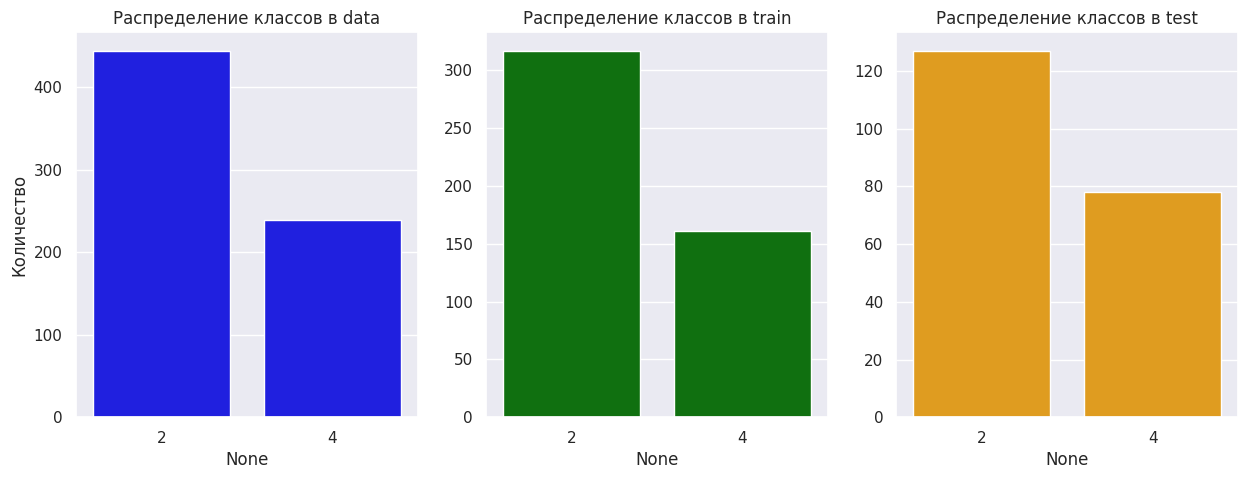

In [13]:
original = data['Class'].value_counts() # Колонка таргета из изначального датасета
train = y_train.value_counts() # Колонка таргета из тренировочного датасета
test = y_test.value_counts() # Колонка таргета из тестового датасета

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=original.index, y=original.values, ax=axes[0], palette=['blue'])
axes[0].set_title('Распределение классов в data')
axes[0].set_ylabel('Количество')

sns.barplot(x=train.index, y=train.values, ax=axes[1], palette=['green'])
axes[1].set_title('Распределение классов в train')

sns.barplot(x=test.index, y=test.values, ax=axes[2], palette=['orange'])
axes[2].set_title('Распределение классов в test')

plt.show()

Видно, что в данных есть сильный перекос — классы представлены неравномерно. Как и почему это повлияло на наши результаты?

**Ответ:** по диаграммам видно, что Class 2 практически в два раза больше как в изначальном датасете, так и в тренировочных и тестовых выборках. Так как мы обучали модель на тренировочной выборке, делали предсказания для тестовой,  и в той и другой соотношения между классами 2 и 4 преблизительно равны 2:1,поэтому метрики и оказались близки к 1.

Есть много способов борьбы с этим. Можно искусственно сгенерировать данные нужного класса или урезать другой класс. Однако сегодня мы воспользуемся ***взвешенной*** логистической регрессией. Суть метода заключается в том, чтобы вручную поставить веса для классов, исходя из их предполагаемой природы: важность разных классов, цена ошибки в реальной жизни (например, что хуже: предсказать наличие рака, если он есть или нет?) и представленность данных.

Функция потерь &mdash; в нашем случае логарифм функции правдоводобия &mdash; для взвешенной логистической регресси будет записана как:

$$
L(y, \widehat{y}) = \sum_{i=1}^{N} w_{y_i} \cdot \left[ y_i \cdot \log(\sigma(\widehat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\widehat{y}_i)) \right]
$$

где:


- $ y_i $ - истинный класс для образца  $i$
- $ \widehat{y}_i $ - предсказанный класс для образца $i$
- $ w_{y_i} $ - вес класса



Давайте реализуем этот метод. Допишите код и в качестве весов класса  поставьте соотношение их представленности. Выведите подсчет количества экземпляров каждого класса и посчитайте их соотношение.

In [14]:
data['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [15]:
threshold = 444/(444+239)
class_weights = {2: threshold, 4: 1 - threshold}
# если использовать class_weights = 'balanced', модель сама подсчитает веса

weighted_model = LogisticRegression(class_weight=class_weights)

In [16]:
# обучим модель на тренировочной выборке
weighted_model.fit(X_train, y_train)
y_pred_wei=weighted_model.predict(X_test)

Посчитайте метрики качества. `Accuracy` посчитайте двумя способами: без учёта и [с учётом весов](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html).

In [17]:
accuracy=accuracy_score(y_test,y_pred_wei)
precision=precision_score(y_test,y_pred_wei,pos_label=2)
recall=recall_score(y_test,y_pred_wei, pos_label=2)

from sklearn.metrics import balanced_accuracy_score
# с учётом весов
balanced_accuracy=balanced_accuracy_score(y_test, y_pred_wei, sample_weight=None, adjusted=False)

print(f"accuracy = {accuracy} \nprecision = {precision} \nrecall = {recall} \nbalanced_accuracy={balanced_accuracy}")

accuracy = 0.9463414634146341 
precision = 0.9328358208955224 
recall = 0.984251968503937 
balanced_accuracy=0.9344336765596608


Как изменилось качество нашей модели? Почему надо учитывать несбалансированность данных?

По полученным данным можно увидеть, что значения метрис accuracy и precision уменьшились, что показывает уменьшение качества(количества правильных предсказаний) и точности нашей модели. Несбадансированность данных нужно учитывать, чтобы избежать сильного влияния на обучение модели.
Также можем заметить,что метрики Accuracy с учетом весов и без не сильно отличаются друг от друга, это показывает недостатки данной метрики.


**Вывод:** В данной задаче были исследованы данные по предсказанию рака груди, по каждому из прищнаков были построены сгистограммы и ядерные оценки плотности.
по данным была обучена модель, а также была изучена работа стандартизации StandardScaler. Были изучены такие метрики, как Recall. Accuracy и Precission. Научились учитывать дисбаланс классов методом взвешенной логистической регрессии, по результатам можно сделать вывод, что нужно если не учитывать несбалансированность классов, то это может привести к уменьшению качетва и точности модели.

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; `Lasso`, `Ridge`, `Elastic Net`.  

При выполнении задания воспользуйтесь готовыми реализациями методов в `sklearn`. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [9]:
def calculate_coef(model, X, y, log_min, log_max,
               num):
    """
    Данная функция считает коэффициенты для признаков
    при различных значениях параметра регуляризации.

    :param model: регрессионная модель
    :param X: матрица регрессоров
    :param y: вектор целевой переменной
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона

    :return coefs: коэффициенты модели
    """

    alphas = np.logspace(log_min, log_max, num) # сетка параметров
    coefs = [] # коэффициенты моделей
    for a in alphas:
        if 'l1_ratio' in model.get_params(): # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a) # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20])
    return coefs

def draw_track(coefs, log_min, log_max,
               num, title='', figsize=(10, 5)):

    """
    Данная функция строит график зависимости значений
    коэффициентов модели от параметра регуляризации.

    :param coefs: коэффициенты модели
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона
    :param title: название графика
    :param figsize: размеры рисунка

    :return coefs: коэффициенты модели
    """
    alphas = np.logspace(log_min, log_max, num) # сетка параметров

    plt.figure(figsize=figsize)
    ax = plt.gca() # используется для получения текущего экземпляра axes
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
        ind += 1

    ax.set_xscale('log') # логарифмическая шкала
    ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### 1. Загрузка данных

#### *Профиль биология*

Скачайте данные с [сайта](https://miptstats.github.io/courses/ad_mipt.html). Оригинал вместе с описанием можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring). Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей.

In [2]:
df = pd.read_csv('/parkinsons_updrs.data', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков.

Также обратите внимане, что в данных есть группы (пациенты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [3]:
df.drop('motor_UPDRS', axis=1, inplace=True)
X=df.drop(['total_UPDRS','subject#'] ,axis=1, inplace=False)
y=df['total_UPDRS']
num=list(set(df['subject#']))

Разбейте данные на обучающую и тестовую выборки в соотношении 7:3. Здесь не подойдет стандартный метод `test_train_split`, так как в данных есть группы. *Нельзя допускать, чтобы разные записи для одного пациента попали в разные подвыборки*.

**Также, выведите что-либо, подтверждающее данное свойство.**



In [4]:
groups = df["subject#"]
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(gss.split(X, y, groups=groups))


Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку.

**Переходите к пункту 2.**

#### *Профиль физика*

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице в сжатом виде, которые действуют как молекулярные признаки. 0-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа. Этот столбец возьмем в качестве индекса строк. Последний столбец `Eat` — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso. Этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*.

In [ ]:
data = pd.read_csv('physics_data.csv', index_col=0)
data.head()

Разделите данные на признаки $X$ и целевые переменные $y$. **Для дальнейших заданий оставьте 20 признаков.**

In [ ]:
<...>

Разделите выборку в отношении 7:3. Далее везде, вплоть до сравнения моделей, используйте обучающую выборку.

In [ ]:
X_train, X_test, y_train, y_test = <...>

Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку.


#### 2. Влияние регуляризации на коэффициенты моделей

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train, X_test, y_train, y_test= X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

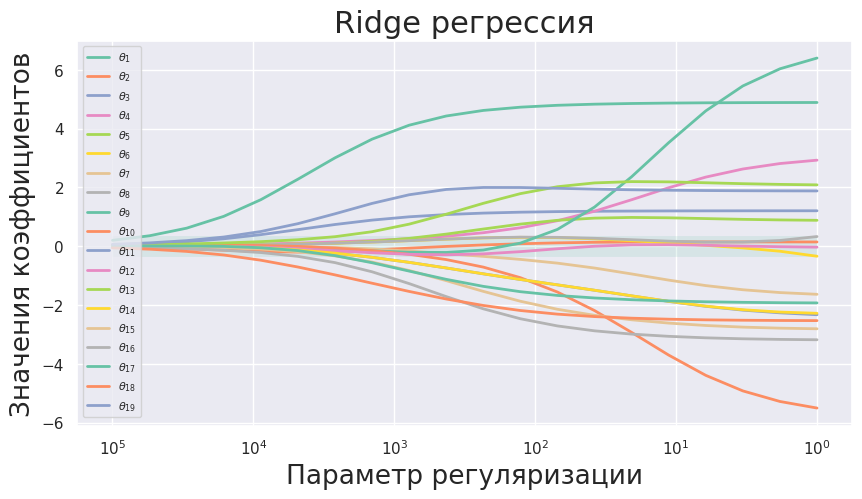

In [10]:
# Ridge регрессия
# инициализация и обучение моддели
ridge_model = Ridge(alpha=0.1, fit_intercept=True)
ridge_model.fit(X_train, y_train)
# коэффициенты регрессии
ridge_coefs =calculate_coef(ridge_model, X_train, y_train, log_min=0, log_max=5,num=20)

# отрисовка
draw_track(ridge_coefs, log_min=0, log_max=5,num=20, title='Ridge регрессия', figsize=(10, 5))

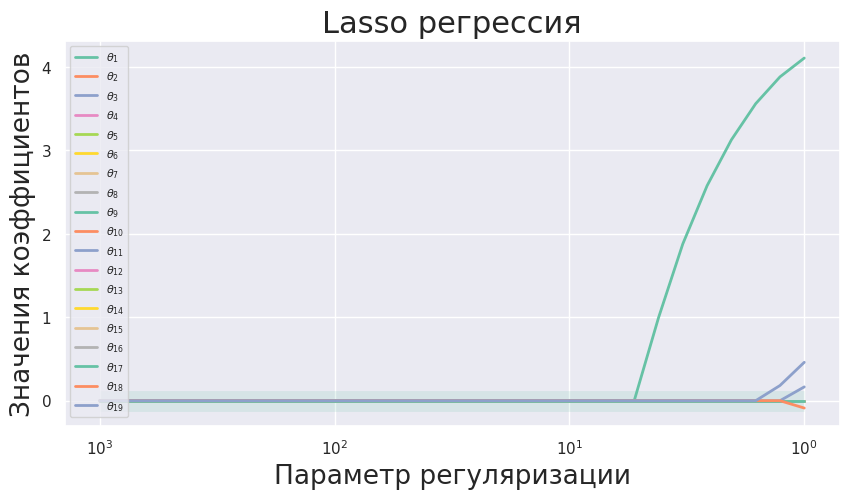

In [11]:
# Lasso регрессия
lasso_model =Lasso(alpha=1.0, fit_intercept=True, max_iter=1000, tol=0.0001, precompute=True)
lasso_model.fit(X_train, y_train)
# посчитаем коэф регрессии
lasso_coefs =calculate_coef(lasso_model, X_train, y_train, log_min=0.0001, log_max=3,num=30)
#отрисовка
draw_track(lasso_coefs, log_min=0.0001, log_max=3,num=30, title='Lasso регрессия', figsize=(10, 5))

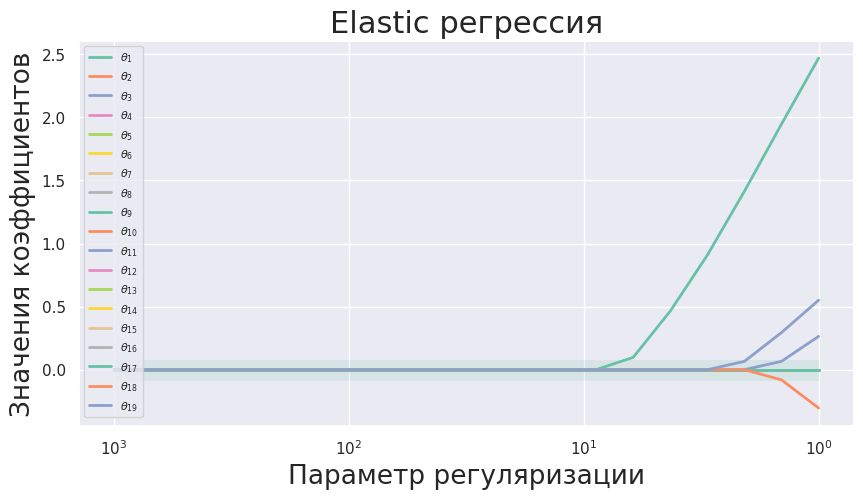

In [12]:
# Elastic регрессия
elastic_model =ElasticNet(alpha=0.001, fit_intercept=True, max_iter=5000, tol=0.0001, precompute=True)
elastic_model.fit(X_train, y_train)
# посчитаем коэф регрессии
elastic_coefs = calculate_coef(elastic_model, X_train, y_train, log_min=0.0001, log_max=3,num=20)
#отрисовка
draw_track(elastic_coefs, log_min=0.0001, log_max=3,num=20, title='Elastic регрессия', figsize=(10, 5))

**Ответ:** по построенным графикам видно, что значение коэффициентов зависит от параметра регуляризации во всех трех регрессиях. При этом можно заметить,что в Lasso и Elastic регрессиях влиянение параметра более сильное, так как значения коэффициентов быстрее обращаются в ноль, чем в Ridge  регрессии.

Посмотрите, как выглядят графики без стандартизации. Почему так происходит?

In [13]:
# разделим данные на train и test без стандартизации
X_train2, X_test2, y_train2, y_test2= X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]

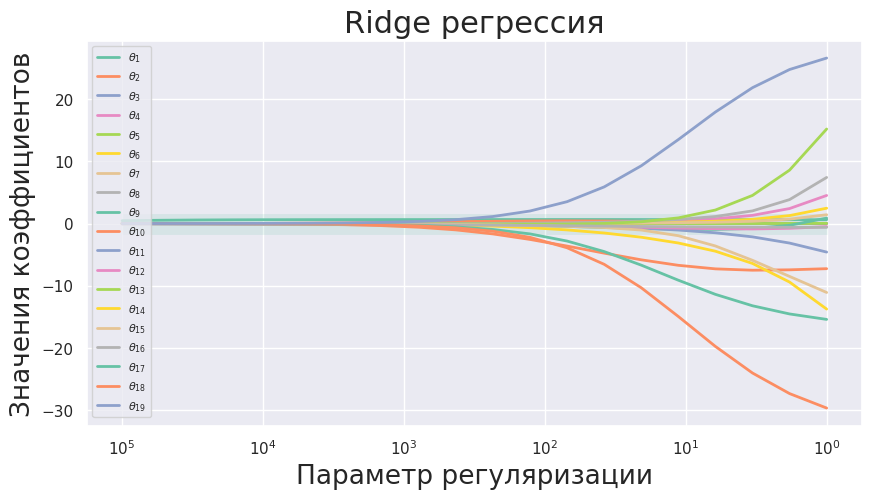

In [14]:
# Ridge регрессия
# инициализация и обучение моддели
ridge_model = Ridge(alpha=0.1, fit_intercept=True)
ridge_model.fit(X_train2, y_train2)
# коэффициенты регрессии
ridge_coefs =calculate_coef(ridge_model, X_train2, y_train2, log_min=0, log_max=5,num=20)

# отрисовка
draw_track(ridge_coefs, log_min=0, log_max=5,num=20, title='Ridge регрессия', figsize=(10, 5))

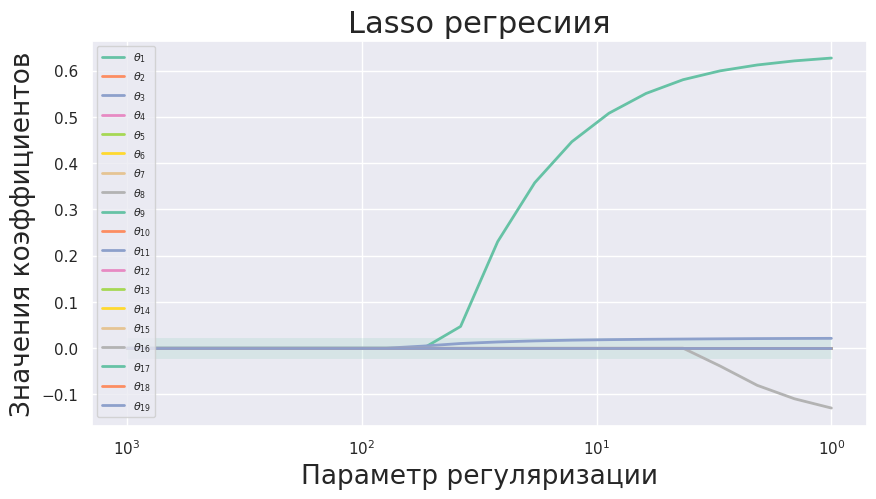

In [15]:
# Lasso регрессия
lasso_model =Lasso(alpha=1.0, fit_intercept=True, max_iter=1000, tol=0.0001, precompute=True)
lasso_model.fit(X_train2, y_train2)
# посчитаем коэф регрессии
lasso_coefs =calculate_coef(lasso_model, X_train2, y_train2, log_min=0.0001, log_max=3,num=20)
#отрисовка
draw_track(lasso_coefs, log_min=0.0001, log_max=3,num=20, title='Lasso регресиия', figsize=(10, 5))

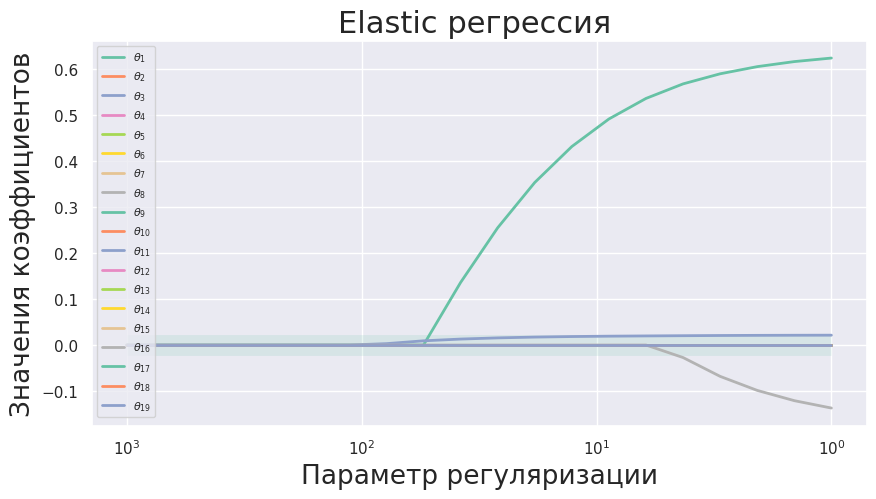

In [16]:
# Elastic регрессия
elastic_model =ElasticNet(alpha=0.001, fit_intercept=True, max_iter=5000, tol=0.0001, precompute=True)
elastic_model.fit(X_train2, y_train2)
# посчитаем коэф регрессии
elastic_coefs = calculate_coef(elastic_model, X_train2, y_train2, log_min=0.0001, log_max=3,num=20)
#отрисовка
draw_track(elastic_coefs, log_min=0.0001, log_max=3,num=20, title='Elastic регрессия ', figsize=(10, 5))

**Ответ:** по графикам видно, что без стандартизации значения коэффициентов Ridge регрессии принимают значение 0 при меньших значениях параметра регуляризации, чем с стандартизацией. Для Lasso и Elastic-наоборот. Это объясняется тем, что без стандартизации коэффициенты каждой модели будут иметь разный маштаб и несопостовимы друг с другом

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета.

In [17]:
# опять стандартизуем данные
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

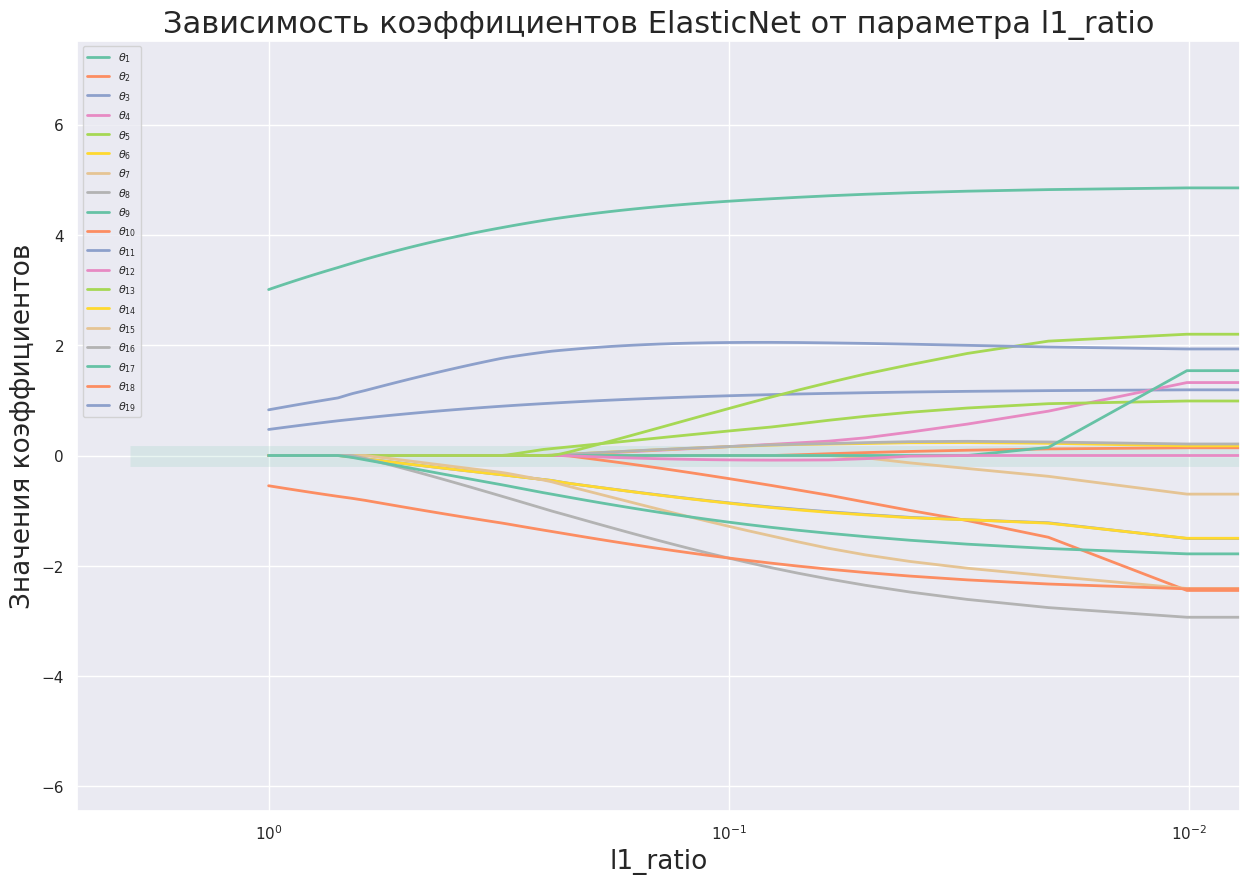

In [18]:
grid = np.linspace(0,1,100)
coefs = []
model = ElasticNet()

for l1_ratio in grid:
    model=ElasticNet(l1_ratio) # Задайте новый параметр модели
    model.fit(X_train, y_train) # Обучите
    coefs.append(model.coef_)# Добавьте в список

# Для визуализации можно использовать код из функции draw_track
plt.figure(figsize=(15,10))
ax = plt.gca() # используется для получения текущего экземпляра axes
ax.hlines(0,  -1,  2, linewidth=15, alpha=0.15)
ind = 1
for coef in np.array(coefs).T:
    label = r'$\theta_{' + str(ind) + '}$'
    ax.plot(grid, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
    ind += 1

ax.set_xscale('log') # логарифмическая шкала
ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
plt.xlabel('l1_ratio', fontsize=19)
plt.ylabel('Значения коэффициентов', fontsize=19)
plt.title('Зависимость коэффициентов ElasticNet от параметра l1_ratio', fontsize=22)
plt.legend(loc='upper left', fontsize=8)
plt.axis('tight')
plt.show()

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

**Вывод:** параметры регуляризации лучше всего рассматривать в диапазоне от 0.1 до 1, так как на этом диапазоне значения коэффициентов не сильно разбросаны.


**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

***Физика:*** Для этого задания возьмите полный датасет &mdash; все 300 признаков.

In [ ]:
<...>

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [19]:
model_linreg= LinearRegression(fit_intercept=True)
model_linreg.fit(X_train, y_train) #обучим модель лин. регрессии и найдем предположительные значения
y_pred=model_linreg.predict(X_test)

linreg={}
linreg['MSE'] = mean_squared_error(y_test, y_pred)
linreg['MAE'] = mean_absolute_error(y_test, y_pred)
linreg['MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
print(linreg)

{'MSE': 184.03400709182333, 'MAE': 11.83613348006452, 'MAPE': 0.6480392530212562}


Допишите функцию для отрисовки изменения величины ошибки от параметра регуляризации.

In [25]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей

    :param error: функция, вычисляющая ошибку
    :param error_name: имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    :param alphas: массив величин alpha
    """
    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = [Ridge(alpha=a),Lasso(alpha=a) , ElasticNet(l1_ratio=0.01, alpha=a), ElasticNet(l1_ratio=0.4, alpha=a),ElasticNet(l1_ratio=0.8, alpha=a)]
        for model in models:

            # обучение модели и предсказание
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names =['Ridge регрессия', ' Lasso регрессия', 'Elastic регрессия с l1_ratio=0.01','Elastic регрессия с l1_ratio=0.4', 'Elastic регрессия с l1_ratio=0.8' ]
    for i in range(5):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha

    # прерывистой линией рисуем ошибки логрега без регуляризации
    plt.hlines(linreg[error_name], alphas[0], alphas[-1], color='black', label = 'No regularization', linestyles='dashed')
    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [26]:
alphas = np.logspace(-2, 8, 20)

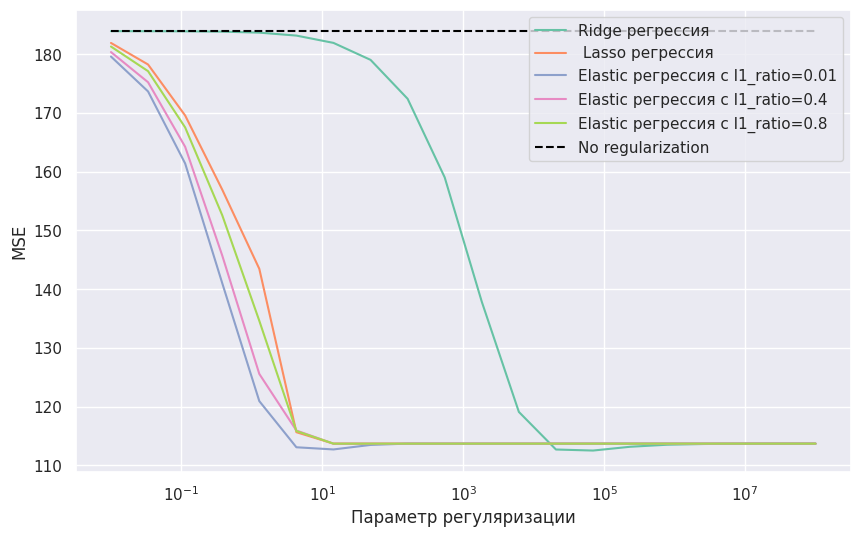

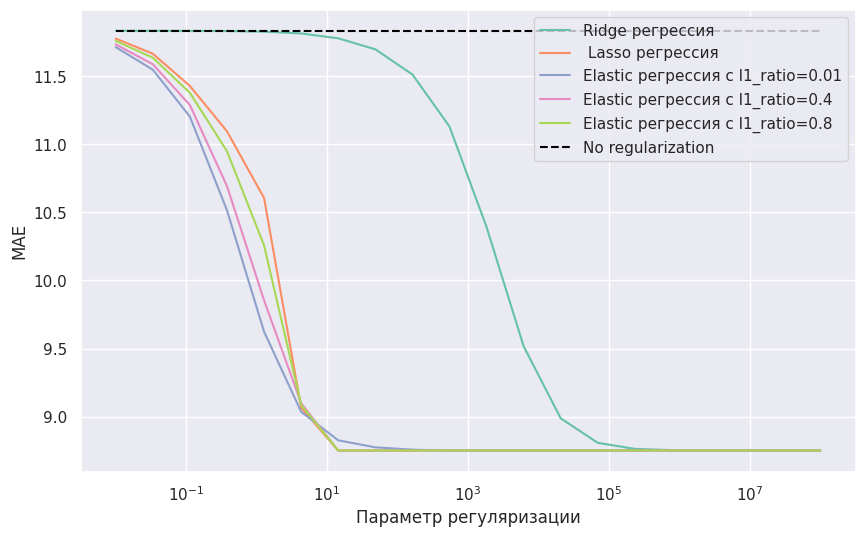

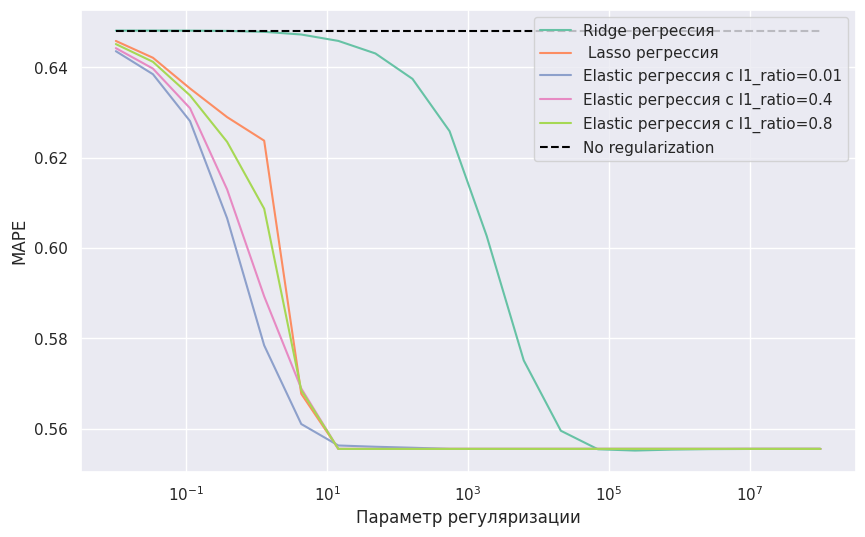

In [27]:
# вложите в функции метрики
draw_errors(mean_squared_error,'MSE',alphas)
draw_errors(mean_absolute_error, 'MAE', alphas)
draw_errors(mean_absolute_percentage_error, 'MAPE', alphas)

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

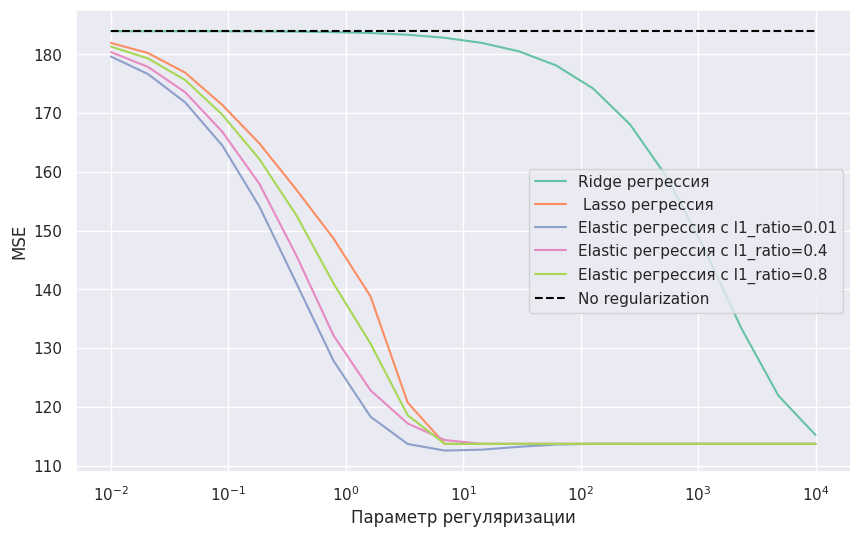

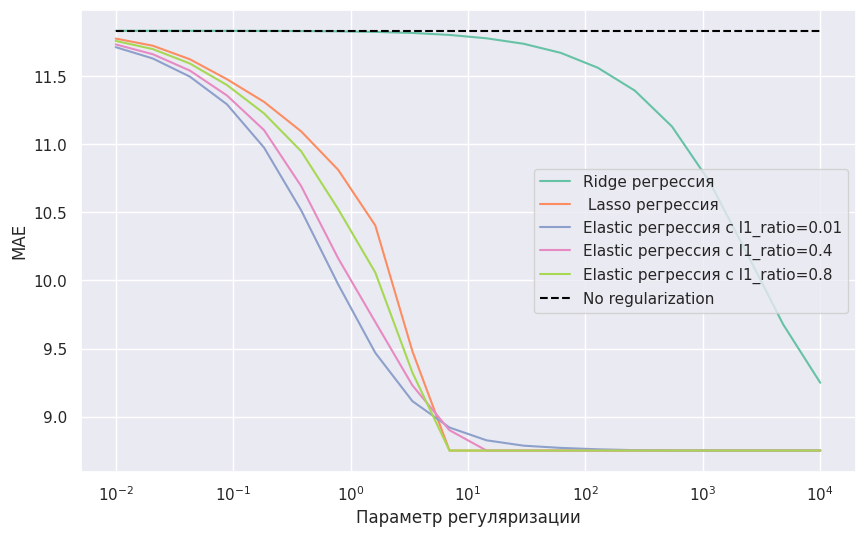

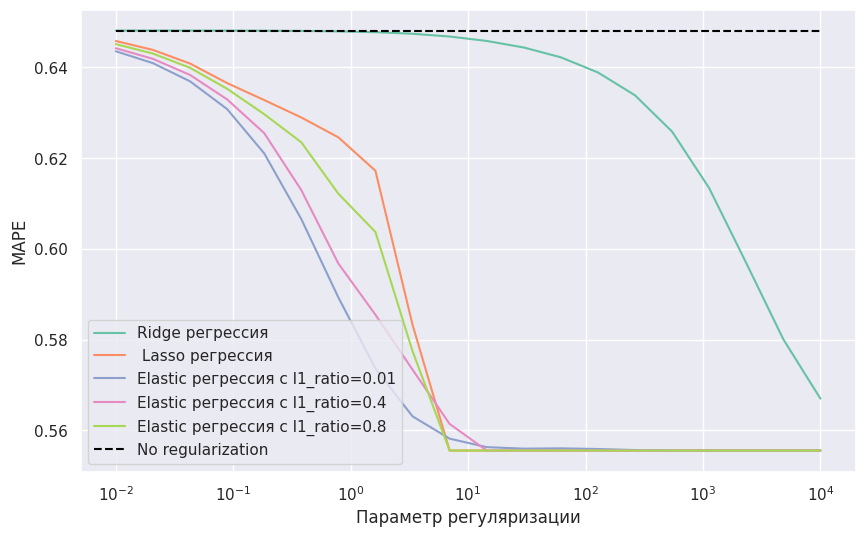

In [28]:
alphas = np.logspace(-2, 4, 20)

draw_errors(mean_squared_error,'MSE',alphas)
draw_errors(mean_absolute_error, 'MAE', alphas)
draw_errors(mean_absolute_percentage_error, 'MAPE', alphas)

**3.** Сделайте общий вывод по задаче.

Укажите: в чем разница между `L1` и `L2` регуляризациями, как реализуется регуляризация в `ElasticNet`, что такое `l1-ratio` и зачем нужен, как это видно в наших графиках. (Своими словами)

**Вывод:** L1 регулярризация может занулить веса признаков до нуля, тем самым убрать неинформативные признаки и сделать нашу мождель проще; L2 регуляризация может устремить большие значения весов признаков до нуля, но не обнуляет их, тем самым сложность модели остается, но она становится более точной. ElasticNet реализуется, как объединение L1 и L2  регуляризаций.

Так как ElasticNet  объединяет в себе две регуляризации, то в функции потрерь должно быть учтена доля каждой регулярицации. Парметр l1_ratio- параметр сшивки , он лежит в диапазоне от 0 до 1 и показывает, в каком соотношении учтены регуляризации L1 и L2. Т.е. если l1_ratio=1, то доля Lasso регресии 100%, а Ridge -0. Это можно увидеть и по нашим графикам, чем больще параметр l1_ratio, тем график ближе к графику с L1 регуляризацией.

## Задача 4


Регуляризацию успользуют не только в задачах регрессии, но и в задачах классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция *правдоподобия*, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Мы получили логистическую регрессию c **$l_2$-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому такого понятия как "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение*,согласно выбранной метрике.

Выведите формулу поиска оценки коэффициентов методом *градиентного подъёма* и *стохастического градиентного подъёма* для
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией